In [1]:
import os
import numpy as np 
import pandas as pd
from scipy import stats, signal, io
import mne
from mne import create_info, EpochsArray
from mne.time_frequency import tfr_morlet
from bids import BIDSLayout
import mne_bids
import scipy
#import settings
import json
#from coordinates_io import BIDS_coord
from sklearn import linear_model, metrics
import multiprocessing
from sklearn.model_selection import cross_val_score
from sklearn import ensemble, model_selection
from matplotlib import pyplot as plt
import matplotlib 
from multiprocessing import get_context
from multiprocessing import Process

In [2]:
BIDS_path = 'C:\\Users\\ICN_admin\\Documents\\BIDS\\'
subject_id = ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']
out_path = 'C:\\Users\\ICN_admin\\Documents\\ECOGVSTN\\Figure 2\\LM_100ms\\'

In [9]:
def get_best(dict_ch, Con=True, ECOG=True, get_weights=True, get_data=False, measure='R2'):
    """
    return best channel name, best channel performance, and respective weights
    """
    channels = list(dict_ch.keys())
    if ECOG is True:
        list_ch = [ch for ch in channels if 'ECOG' in ch]
        num_ch = len(list_ch)
    else:
        list_ch = [ch for ch in channels if 'STN' in ch]
        num_ch = len(list_ch)

    if num_ch == 0:
        raise ValueError

    
    acc_ = np.zeros(num_ch)
    mov_idx_ = np.zeros(num_ch)
    counter_ch = 0

    for ch_idx, ch  in enumerate(channels):
        print(ch)
        if ECOG is True and 'STN' in ch:
            continue
        elif ECOG is False and 'ECOG' in ch:
            continue
        mov_channels = dict_ch[channels[ch_idx]]["mov_ch"]
        mov_idx = get_movement_idx(channels[ch_idx], mov_channels, Con)
        acc_[counter_ch] = dict_ch[channels[ch_idx]]['res_'+mov_channels[mov_idx]][measure]
        mov_idx_[counter_ch] = mov_idx
        counter_ch += 1

    best_ch_idx = np.argmax(acc_)
    mov_idx_best = int(mov_idx_[best_ch_idx])
    best_ch = list_ch[best_ch_idx]; best_acc = np.max(acc_)
    if get_weights is False:
        if get_data is False:
            return best_ch, best_acc
        else:
            return best_ch, best_acc, np.array(dict_ch[best_ch]['data']), \
                                       np.array(dict_ch[best_ch]['true_movements'])[mov_idx_best,:]
    best_weights = dict_ch[channels[best_ch_idx]]['res_'+mov_channels[mov_idx_best]]['weight_'+mov_channels[mov_idx_best]]
    return best_ch, best_acc, best_weights

def get_movement_idx(ch, mov_channels, Con=True):
    mov_idx = 0
    if len(mov_channels) > 1:    
        if Con is True:
            if ("RIGHT" in ch and "LEFT" in mov_channels[0]) or \
                ("LEFT" in ch and "RIGHT" in mov_channels[0]):
                mov_idx = 0
            if ("RIGHT" in ch and "LEFT" in mov_channels[1]) or \
                ("LEFT" in ch and "RIGHT" in mov_channels[1]):
                mov_idx = 1
        else:
            if ("RIGHT" in ch and "RIGHT" in mov_channels[0]) or \
                ("LEFT" in ch and "LEFT" in mov_channels[0]):
                mov_idx = 0
            if ("RIGHT" in ch and "RIGHT" in mov_channels[1]) or \
                ("LEFT" in ch and "LEFT" in mov_channels[1]):
                mov_idx = 1
    return mov_idx

In [11]:
ECOG_con = []; ECOG_ips = []; STN_con = []; STN_ips = []
for t in np.arange(100, 800, 100):
    out_here = 'C:\\Users\\ICN_admin\\Documents\\Ubuntu_SAVE\\Documents\\raw_out\\'+'LM_'+str(t)+'ms\\'
    ECOG_con_time = []; ECOG_ips_time = []; STN_con_time = []; STN_ips_time = []
    for subject_id_ in subject_id:
        print(subject_id_)
        with open(out_here+'sub_'+subject_id_+'_patient_concat.json', 'r') as fp:
            dict_ch = json.load(fp)
            try:
                ECOG_con_time.append(get_best(dict_ch, Con=True, ECOG=True)[1])
                ECOG_ips_time.append(get_best(dict_ch, Con=False, ECOG=True)[1])
                STN_con_time.append(get_best(dict_ch, Con=True, ECOG=False)[1])
                STN_ips_time.append(get_best(dict_ch, Con=False, ECOG=False)[1])
            except ValueError: # no STN 
                pass
    ECOG_con.append(ECOG_con_time); ECOG_ips.append(ECOG_ips_time); 
    STN_con.append(STN_con_time); STN_ips.append(STN_ips_time); 

000
ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
STN_RIGHT_0
STN_RIGHT_1
STN_RIGHT_2
STN_RIGHT_3
ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
STN_RIGHT_0
STN_RIGHT_1
STN_RIGHT_2
STN_RIGHT_3
ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
STN_RIGHT_0
STN_RIGHT_1
STN_RIGHT_2
STN_RIGHT_3
ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
STN_RIGHT_0
STN_RIGHT_1
STN_RIGHT_2
STN_RIGHT_3
001
ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
ECOG_RIGHT_6
ECOG_RIGHT_7
ECOG_RIGHT_8
ECOG_RIGHT_9
ECOG_RIGHT_10
ECOG_RIGHT_11
ECOG_RIGHT_12
ECOG_RIGHT_13
ECOG_RIGHT_14
ECOG_RIGHT_15
ECOG_RIGHT_16
ECOG_RIGHT_17
ECOG_RIGHT_18
ECOG_RIGHT_19
ECOG_RIGHT_20
ECOG_RIGHT_21
ECOG_RIGHT_22
ECOG_RIGHT_23
ECOG_RIGHT_24
ECOG_RIGHT_25
ECOG_RIGHT_26
ECOG_RIGHT_27
STN_RIGHT_0
STN_RIGHT_1
STN_RIGHT_2
STN_RIGHT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_

ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
008
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
009
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG

ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
ECOG_RIGHT_6
ECOG_RIGHT_7
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
ECOG_LEFT_6
ECOG_LEFT_7
ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
ECOG_RIGHT_6
ECOG_RIGHT_7
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
ECOG_LEFT_6
ECOG_LEFT_7
ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
ECOG_RIGHT_6
ECOG_RIGHT_7
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
ECOG_LEFT_6
ECOG_LEFT_7
ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
ECOG_RIGHT_6
ECOG_RIGHT_7
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
ECOG_LEFT_6
ECOG_LEFT_7
006
ECOG_RIGHT_0
ECOG_RI

ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
STN_RIGHT_0
STN_RIGHT_1
STN_RIGHT_2
STN_RIGHT_3
ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
STN_RIGHT_0
STN_RIGHT_1
STN_RIGHT_2
STN_RIGHT_3
ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
STN_RIGHT_0
STN_RIGHT_1
STN_RIGHT_2
STN_RIGHT_3
ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
STN_RIGHT_0
STN_RIGHT_1
STN_RIGHT_2
STN_RIGHT_3
001
ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
ECOG_RIGHT_6
ECOG_RIGHT_7
ECOG_RIGHT_8
ECOG_RIGHT_9
ECOG_RIGHT_10
ECOG_RIGHT_11
ECOG_RIGHT_12
ECOG_RIGHT_13
ECOG_RIGHT_14
ECOG_RIGHT_15
ECOG_RIGHT_16
ECOG_RIGHT_17
ECOG_RIGHT_18
ECOG_RIGHT_19
ECOG_RIGHT_20
ECOG_RIGHT_21
ECOG_RIGHT_22
ECOG_RIGHT_23
ECOG_RIGHT_24
ECOG_RIGHT_25
ECOG_RIGHT_26
ECOG_RIGHT_27
STN_RIGHT_0
STN_RIGHT_1
STN_RIGHT_2
STN_RIGHT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
EC

ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
008
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
009
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG

ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
ECOG_RIGHT_6
ECOG_RIGHT_7
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
ECOG_LEFT_6
ECOG_LEFT_7
ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
ECOG_RIGHT_6
ECOG_RIGHT_7
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
ECOG_LEFT_6
ECOG_LEFT_7
ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
ECOG_RIGHT_6
ECOG_RIGHT_7
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
ECOG_LEFT_6
ECOG_LEFT_7
ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
ECOG_RIGHT_6
ECOG_RIGHT_7
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
ECOG_LEFT_6
ECOG_LEFT_7
006
ECOG_RIGHT_0
ECOG_RI

ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
STN_RIGHT_0
STN_RIGHT_1
STN_RIGHT_2
STN_RIGHT_3
ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
STN_RIGHT_0
STN_RIGHT_1
STN_RIGHT_2
STN_RIGHT_3
ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
STN_RIGHT_0
STN_RIGHT_1
STN_RIGHT_2
STN_RIGHT_3
ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
STN_RIGHT_0
STN_RIGHT_1
STN_RIGHT_2
STN_RIGHT_3
001
ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
ECOG_RIGHT_6
ECOG_RIGHT_7
ECOG_RIGHT_8
ECOG_RIGHT_9
ECOG_RIGHT_10
ECOG_RIGHT_11
ECOG_RIGHT_12
ECOG_RIGHT_13
ECOG_RIGHT_14
ECOG_RIGHT_15
ECOG_RIGHT_16
ECOG_RIGHT_17
ECOG_RIGHT_18
ECOG_RIGHT_19
ECOG_RIGHT_20
ECOG_RIGHT_21
ECOG_RIGHT_22
ECOG_RIGHT_23
ECOG_RIGHT_24
ECOG_RIGHT_25
ECOG_RIGHT_26
ECOG_RIGHT_27
STN_RIGHT_0
STN_RIGHT_1
STN_RIGHT_2
STN_RIGHT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
EC

ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
008
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
009
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG

ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
ECOG_RIGHT_6
ECOG_RIGHT_7
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
ECOG_LEFT_6
ECOG_LEFT_7
ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
ECOG_RIGHT_6
ECOG_RIGHT_7
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
ECOG_LEFT_6
ECOG_LEFT_7
ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
ECOG_RIGHT_6
ECOG_RIGHT_7
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
ECOG_LEFT_6
ECOG_LEFT_7
ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
ECOG_RIGHT_6
ECOG_RIGHT_7
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
ECOG_LEFT_6
ECOG_LEFT_7
006
ECOG_RIGHT_0
ECOG_RI

ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
STN_RIGHT_0
STN_RIGHT_1
STN_RIGHT_2
STN_RIGHT_3
ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
STN_RIGHT_0
STN_RIGHT_1
STN_RIGHT_2
STN_RIGHT_3
ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
STN_RIGHT_0
STN_RIGHT_1
STN_RIGHT_2
STN_RIGHT_3
ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
STN_RIGHT_0
STN_RIGHT_1
STN_RIGHT_2
STN_RIGHT_3
001
ECOG_RIGHT_0
ECOG_RIGHT_1
ECOG_RIGHT_2
ECOG_RIGHT_3
ECOG_RIGHT_4
ECOG_RIGHT_5
ECOG_RIGHT_6
ECOG_RIGHT_7
ECOG_RIGHT_8
ECOG_RIGHT_9
ECOG_RIGHT_10
ECOG_RIGHT_11
ECOG_RIGHT_12
ECOG_RIGHT_13
ECOG_RIGHT_14
ECOG_RIGHT_15
ECOG_RIGHT_16
ECOG_RIGHT_17
ECOG_RIGHT_18
ECOG_RIGHT_19
ECOG_RIGHT_20
ECOG_RIGHT_21
ECOG_RIGHT_22
ECOG_RIGHT_23
ECOG_RIGHT_24
ECOG_RIGHT_25
ECOG_RIGHT_26
ECOG_RIGHT_27
STN_RIGHT_0
STN_RIGHT_1
STN_RIGHT_2
STN_RIGHT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
EC

ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
008
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG_LEFT_5
STN_LEFT_0
STN_LEFT_1
STN_LEFT_2
STN_LEFT_3
009
ECOG_LEFT_0
ECOG_LEFT_1
ECOG_LEFT_2
ECOG_LEFT_3
ECOG_LEFT_4
ECOG

In [16]:
def my_boxplot(alpha_con, alpha_ips):
    data_a = alpha_con
    data_b = alpha_ips
    ticks = [str(i) for i in range(len(alpha_con))]

    bpl = plt.boxplot(data_a, positions=np.array(range(len(ticks)))*2.0-0.4, widths=0.6, patch_artist=True, showmeans=True)
    bpr = plt.boxplot(data_b, positions=np.array(range(len(ticks)))*2.0+0.4, widths=0.6, patch_artist=True, showmeans=True)
    set_box_color(bpl, 'red') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, 'blue')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='red', label='contralateral')
    plt.plot([], c='blue', label='ipsilateral')
    plt.xticks(range(0, len(ticks) * 2, 2), ['alpha', 'theta', 'low beta', 'high beta', 'all beta', \
                        'low gamma', 'high gamma', 'all gamma'], rotation=45)
    plt.xlim(-2, len(ticks)*2)
    plt.xlabel('patient')
    plt.tight_layout()
def set_box_color(bp, color):
    #plt.setp(bp['boxes'], color='black')
    #plt.setp(bp['whiskers'], color='black')
    #plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')
    l_ = []
    l_.append(color)
    l_ = l_*len(bp['boxes']) 
    for patch, color_ in zip(bp['boxes'], l_):
        patch.set_facecolor(color_)
    

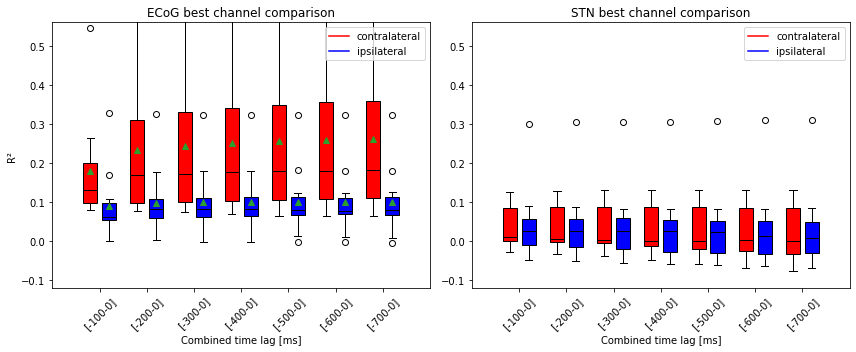

In [ ]:
plt.figure(figsize=(12,5))#, dpi=300)
plt.subplot(121)
my_boxplot(ECOG_con, ECOG_ips)
plt.xticks(range(0, len(ECOG_con) * 2, 2), \
           ['[-100-0]', '[-200-0]', '[-300-0]', '[-400-0]', '[-500-0]', '[-600-0]', '[-700-0]'], rotation=45)

#plt.gca().invert_xaxis()
plt.xlabel('Combined time lag [ms]')
plt.ylim(-0.12, 0.56)
plt.ylabel('R²')
plt.legend(loc='upper right')
plt.title('ECoG best channel comparison')
#plt.grid(True)
plt.subplot(122)
my_boxplot(STN_con, STN_ips)
plt.xticks(range(0, len(ECOG_con) * 2, 2), \
           ['[-100-0]', '[-200-0]', '[-300-0]', '[-400-0]', '[-500-0]', '[-600-0]', '[-700-0]'], rotation=45)

#plt.gca().invert_xaxis()
plt.xlabel('Combined time lag [ms]')
plt.ylim(-0.12, 0.56)
#plt.ylabel('R²')
plt.legend(loc='upper right')
plt.title('STN best channel comparison')
plt.tight_layout()
#plt.grid(True)

In [ ]:
# problem here: the 